In [4]:
import requests
r = requests.get("https://papimo.jp/h/00031791/hit/view/702")

In [2]:
import numpy as np 
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

In [5]:
import urllib.request
import random
#収集先サイト
target_url = 'https://papimo.jp/h/00031792/hit/view/701/20231015'
#target_url = 'https://yahoo.co.jp'
#target_url = 'https://www.amazon.co.jp/'
opener = urllib.request.build_opener()
scraping_model_list = opener.open(target_url).read().decode('utf-8').replace("&amp;", "&")
print(scraping_model_list)

<!DOCTYPE html><html lang="ja"><head><meta charset="utf-8"/><title>ビックディッパー１号店 - マイジャグラーⅤ - 大当り情報</title><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta http-equiv="Pragma" content="no-cache" /><meta http-equiv="Cache-Control" content="no-cache" /><meta name="keywords" content="大当たり,大当り,出玉情報,出玉グラフ,大当り履歴,台データ,スランプ,パチスロ,パチンコ" /><meta name="description" content="ビックディッパー１号店 - マイジャグラーⅤ - 大当り情報" /><meta name="author" content="GLORY NASCA ltd." /><meta name="Copyright" content="Copyright (C) GLORY NASCA ltd. All Rights Reserved." /><link href="/h/apple-touch-icon-hit.png" rel="apple-touch-icon"><!-- Geniee Wrapper Head Tag --><script>  window.gnshbrequest = window.gnshbrequest || {cmd:[]};
  gnshbrequest.cmd.push(function(){
    gnshbrequest.registerPassback("1477665");
    gnshbrequest.registerPassback("1484137");
    gnshbrequest.registerPassback("1484146");
    gnshbrequest.registerPassback("1484147");
    gnshbrequest.registerPassback("1491311");
    gnshbrequest.regi

In [1]:
import pandas as pd


In [7]:
from bs4 import BeautifulSoup
from urllib import request

url = 'https://papimo.jp/h/00031792/hit/view/701/20231015'
response = request.urlopen(url)
soup = BeautifulSoup(response)
response.close()



In [8]:
#date: yyyymmdd    num: xxx or xxxx
def getdata(date, num):
    url = f'https://papimo.jp/h/00031792/hit/view/{num}/{date}'

    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()
    table = soup.find('table', class_='history')
    mat = []  # 保存先の行列
    # tableの取得
    
   
    # tbodyの解析
    tbody = table.find('tbody')  # tbodyタグを探す
    trs = tbody.find_all('tr')  # tbodyからtrタグを探す
    for tr in trs:
        r = []  # 保存先の行
        for td in tr.find_all('td'):  # trタグからtdタグを探す
            r.append(td.text)  # tdタグのテキストを保存
        mat.append(r)
    df = pd.DataFrame(mat)
    name = soup.find('p', class_='name').get_text()
    df['name'] = name
    df['num'] = num
    df['date'] = date
    df.columns = ['count', 'time', 'start', 'payout', 'status', 'name', 'number', 'date']
    df.drop('count', axis=1)
    return df


In [9]:
import numpy as np
daiban = np.arange(701, 994)
daibanb = np.arange(1501, 1769)
daiban = np.concatenate([daiban, daibanb])


In [7]:
oct8_16 = np.arange(20231017, 20231018)

In [8]:
bds1_20231017 = pd.DataFrame(index=[]) 

In [13]:
import numpy as np
daiban = np.arange(701, 994)
daibanb = np.arange(1501, 1769)
daiban = np.concatenate([daiban, daibanb])


def getalldata(yyyymmdd):    
    output = pd.DataFrame(index=[]) 
    for i in range(len(daiban)):
        try:
            dataframe = getdata(yyyymmdd, daiban[i])
        except: continue
        output = pd.concat([output, dataframe])
    output = output.drop('count', axis=1)
    output['payout'] = output['payout'].str.replace(',', '')
    output['start'] = output['start'].replace(',', '')
    output.to_csv(f'./bds1_{yyyymmdd}.csv', index=False)

In [11]:
bds1_20231017 = bds1_20231017.drop('count', axis=1)

In [40]:
bds1_20231017.to_csv('./bds1_231017.csv', index=False)

In [47]:
bds1_20231017.iloc[0]

time         22:34
start           11
payout          96
status         REG
name      マイジャグラーⅤ
number         701
date      20231017
Name: 0, dtype: object

In [35]:
bds1_20231017['payout'] = bds1_20231017['payout'].str.replace(',', '')

In [33]:
for i in range(len(bds1_20231017)):
    try:
        bds1_20231017['payout'][i] = bds1_20231017['payout'][i].str.replace(',', '').astype(int)
    except: continue

In [39]:
bds1_20231017 = bds1_20231017.drop('index', axis=1)

In [29]:
bds1_20231017['payout'][1]

'240'

In [14]:
getalldata(20231018)

In [11]:
output = pd.DataFrame(index=[]) 

In [5]:
import numpy as np
from numpy.linalg import lstsq

def best_fit_plane(coords):
    """
    Calculate the equation of the best-fit plane using the least squares method.

    Parameters:
    - coords: numpy array of shape (n, 3), where n is the number of 3D coordinates.

    Returns:
    - normal_vector: numpy array representing the normal vector of the plane.
    - d: scalar representing the distance from the origin to the plane.
    """

    # Augment the coordinates with ones to account for the constant term in the plane equation
    augmented_coords = np.hstack([coords, np.ones((len(coords), 1))])

    # Use the least squares method to solve Ax = B, where A contains the augmented coordinates and B is all ones
    _, _, _, normal_vector = lstsq(augmented_coords[:, :-1], -augmented_coords[:, -1], rcond=None)

    # Extract the normal vector and distance from the origin to the plane
    d = -normal_vector[-1]
    normal_vector = normal_vector[:-1]

    return normal_vector, d

# Example usage:
coordinates = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    # Add more coordinates as needed
])

normal_vector, d = best_fit_plane(coordinates)

print("Equation of the best-fit plane:")
print(f"{normal_vector[0]}*x + {normal_vector[1]}*y + {normal_vector[2]}*z + {d} = 0")


Equation of the best-fit plane:


IndexError: index 2 is out of bounds for axis 0 with size 2

In [6]:
import numpy as np
from numpy.linalg import lstsq

def best_fit_plane(coords):
    """
    Calculate the equation of the best-fit plane using the least squares method.

    Parameters:
    - coords: numpy array of shape (n, 3), where n is the number of 3D coordinates.

    Returns:
    - normal_vector: numpy array representing the normal vector of the plane.
    - d: scalar representing the distance from the origin to the plane.
    """

    # Augment the coordinates with ones to account for the constant term in the plane equation
    augmented_coords = np.hstack([coords, np.ones((len(coords), 1))])

    # Use the least squares method to solve Ax = B, where A contains the augmented coordinates and B is all ones
    _, _, _, normal_vector = lstsq(augmented_coords[:, :-1], -augmented_coords[:, -1], rcond=None)

    # Extract the normal vector and distance from the origin to the plane
    d = -normal_vector[-1]
    normal_vector = normal_vector[:-1]

    return normal_vector, d

# Example usage:
coordinates = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    # Add more coordinates as needed
])

normal_vector, d = best_fit_plane(coordinates)

print("Equation of the best-fit plane:")
print(f"{normal_vector[0]}*x + {normal_vector[1]}*y + {normal_vector[2]}*z + {d} = 0")


Equation of the best-fit plane:


IndexError: index 2 is out of bounds for axis 0 with size 2

In [7]:
import numpy as np
from numpy.linalg import lstsq

def best_fit_plane(coords):
    """
    Calculate the equation of the best-fit plane using the least squares method.

    Parameters:
    - coords: numpy array of shape (n, 3), where n is the number of 3D coordinates.

    Returns:
    - normal_vector: numpy array representing the normal vector of the plane.
    - d: scalar representing the distance from the origin to the plane.
    """

    # Augment the coordinates with ones to account for the constant term in the plane equation
    augmented_coords = np.hstack([coords, np.ones((len(coords), 1))])

    # Use the least squares method to solve Ax = B, where A contains the augmented coordinates and B is all ones
    _, _, _, normal_vector = lstsq(augmented_coords[:, :-1], -augmented_coords[:, -1], rcond=None)

    # Extract the normal vector and distance from the origin to the plane
    d = -normal_vector[-1]
    normal_vector = normal_vector[:-1]

    return normal_vector, d

# Example usage:
coordinates = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    # Add more coordinates as needed
])

normal_vector, d = best_fit_plane(coordinates)

print("Equation of the best-fit plane:")
print(f"{normal_vector[0]}*x + {normal_vector[1]}*y + {normal_vector[2]}*z + {d} = 0")


Equation of the best-fit plane:


IndexError: index 2 is out of bounds for axis 0 with size 2

In [8]:
import numpy as np
from numpy.linalg import lstsq

def best_fit_plane(coords):
    """
    Calculate the equation of the best-fit plane using the least squares method.

    Parameters:
    - coords: numpy array of shape (n, 3), where n is the number of 3D coordinates.

    Returns:
    - normal_vector: numpy array representing the normal vector of the plane.
    - d: scalar representing the distance from the origin to the plane.
    """

    # Augment the coordinates with ones to account for the constant term in the plane equation
    augmented_coords = np.hstack([coords, np.ones((len(coords), 1))])

    # Use the least squares method to solve Ax = B, where A contains the augmented coordinates and B is all ones
    _, _, _, normal_vector = lstsq(augmented_coords[:, :-1], -augmented_coords[:, -1], rcond=None)

    # Extract the normal vector and distance from the origin to the plane
    d = -normal_vector[-1]
    normal_vector = normal_vector[:-1]

    return normal_vector, d

# Example usage:
coordinates = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    # Add more coordinates as needed
])

normal_vector, d = best_fit_plane(coordinates)

print("Equation of the best-fit plane:")
print(f"{normal_vector[0]}*x + {normal_vector[1]}*y + {normal_vector[2]}*z + {d} = 0")


Equation of the best-fit plane:


IndexError: index 2 is out of bounds for axis 0 with size 2

In [11]:
import numpy as np
from numpy.linalg import lstsq

def best_fit_plane(coords):
    """
    Calculate the equation of the best-fit plane using the least squares method.

    Parameters:
    - coords: numpy array of shape (n, 3), where n is the number of 3D coordinates.

    Returns:
    - normal_vector: numpy array representing the normal vector of the plane.
    - d: scalar representing the distance from the origin to the plane.
    """

    if len(coords) < 3:
        raise ValueError("Insufficient coordinates to determine a plane.")

    # Augment the coordinates with ones to account for the constant term in the plane equation
    augmented_coords = np.hstack([coords, np.ones((len(coords), 1))])

    # Use the least squares method to solve Ax = B, where A contains the augmented coordinates and B is all ones
    _, _, _, normal_vector = lstsq(augmented_coords[:, :-1], -augmented_coords[:, -1], rcond=None)
    print(normal_vector)
    # Extract the normal vector and distance from the origin to the plane
    d = -normal_vector[-1]
    normal_vector = normal_vector[:-1]

    return normal_vector, d

# Example usage:
coordinates = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    # Add more coordinates as needed
])

try:
    normal_vector, d = best_fit_plane(coordinates)
    print("Equation of the best-fit plane:")
    print(normal_vector)
    print(f"{normal_vector[0]}*x + {normal_vector[1]}*y + {normal_vector[2]}*z + {d} = 0")
except ValueError as e:
    print(e)


[1.68481034e+01 1.06836951e+00 3.33475287e-16]
Equation of the best-fit plane:
[16.84810335  1.06836951]


IndexError: index 2 is out of bounds for axis 0 with size 2

In [12]:
import numpy as np
from numpy.linalg import lstsq

def best_fit_plane(coords):
    """
    Calculate the equation of the best-fit plane using the least squares method.

    Parameters:
    - coords: numpy array of shape (n, 3), where n is the number of 3D coordinates.

    Returns:
    - normal_vector: numpy array representing the normal vector of the plane.
    - d: scalar representing the distance from the origin to the plane.
    """

    if len(coords) < 3:
        raise ValueError("Insufficient coordinates to determine a plane.")

    # Augment the coordinates with ones to account for the constant term in the plane equation
    augmented_coords = np.hstack([coords, np.ones((len(coords), 1))])

    # Use the least squares method to solve Ax = B, where A contains the augmented coordinates and B is all ones
    _, _, _, normal_vector = lstsq(augmented_coords[:, :-1], -augmented_coords[:, -1], rcond=None)

    # Extract the normal vector and distance from the origin to the plane
    d = -normal_vector[-1]
    normal_vector = np.append(normal_vector[:-1], 1)  # Append a 1 to make it a 3D vector

    return normal_vector, d

# Example usage:
coordinates = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    # Add more coordinates as needed
])

try:
    normal_vector, d = best_fit_plane(coordinates)
    print("Equation of the best-fit plane:")
    print(f"{normal_vector[0]}*x + {normal_vector[1]}*y + {normal_vector[2]}*z + {d} = 0")
except ValueError as e:
    print(e)


Equation of the best-fit plane:
16.84810335261421*x + 1.0683695145547096*y + 1.0*z + -3.334752865031433e-16 = 0


In [18]:
def testplane(x,y,z):
    return 16.84810335261421*x + 1.0683695145547096*y + 1.0*z 

In [20]:
testplane(1,2,3)

21.98484238172363

In [39]:
tenzen(600,133)

85.79677546261388

[ 2.61002357e+02 -5.47540286e-02 -5.69412128e-01 -2.33735902e-05
 -1.34935700e-03 -1.27881603e-04]


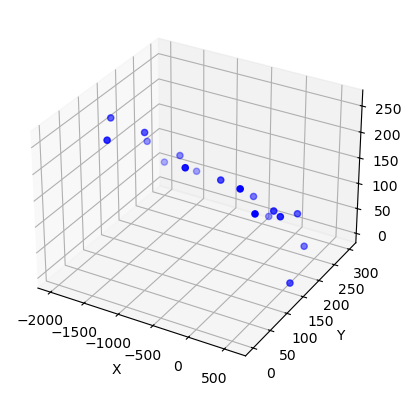

In [31]:
import numpy as np 
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
  
# Generate random 3D data points 
x = np.array([600,600,600,350,350,350,350,-400,-400,-400,-400,-1500,-1500,-1500,-1500,-2000,-2000,-2000])
y = np.array([150,115,40,250,225,150,50,300,250,150,50,300,250,150,50,300,250,150])
z = np.array([0,150,200,0,80,130,230,0,70,160,240,50,110,210,250,50,120,220])
data = np.array([x, y, z]).T 
  
# Define mathematical function for curve fitting 
def func(xy, a, b, c, d, e, f): 
    x, y = xy 
    return a + b*x + c*y + d*x**2 + e*y**2 + f*x*y 
  
# Perform curve fitting 
popt, pcov = curve_fit(func, (x, y), z) 
  
# Print optimized parameters 
print(popt) 
  
# Create 3D plot of the data points and the fitted curve 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x, y, z, color='blue') 
x_range = np.linspace(0, 1, 50) 
y_range = np.linspace(0, 1, 50) 
X, Y = np.meshgrid(x_range, y_range) 
Z = func((X, Y), *popt) 
ax.plot_surface(X, Y, Z, color='red', alpha=0.5) 
ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_zlabel('Z') 
plt.show()

In [20]:
def tenzen(samai,before):
    return func((samai,before), *popt)

C:\Users\yohei_hori\AppData\Local\Temp\ipykernel_91228\2303024065.py:10: RuntimeWarning: overflow encountered in power
  return a + b*x + c*y + + d*y**2 + e*x*y - f**(x/g)


[ 2.37283932e+02 -7.13088992e-02 -6.71649302e-01  1.60303360e-04
  2.39061244e-04  1.47589983e+00  6.27766510e+01]


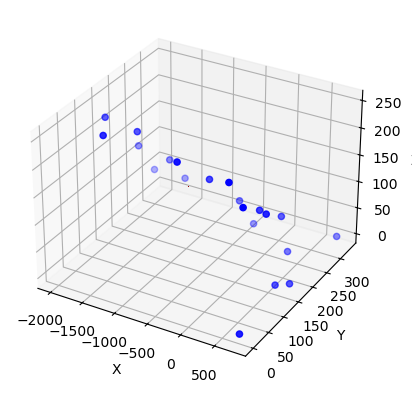

In [40]:
# Generate random 3D data points 
x = np.array([750,750,750,600,600,600,350,350,350,350,-400,-400,-400,-400,-1500,-1500,-1500,-1500,-2000,-2000,-2000])
y = np.array([333,165,0,150,115,40,250,225,150,50,300,250,150,50,300,250,150,50,300,250,150])
z = np.array([0,0,0,0,150,200,0,80,130,230,0,70,160,240,50,110,210,250,50,120,220])
data = np.array([x, y, z]).T 
  
# Define mathematical function for curve fitting 
def func(xy, a, b, c,d, e,f, g): 
    x, y = xy 
    return a + b*x + c*y + + d*y**2 + e*x*y - f**(x/g) 
  
# Perform curve fitting 
popt, pcov = curve_fit(func, (x, y), z) 
  
# Print optimized parameters 
print(popt) 
  
# Create 3D plot of the data points and the fitted curve 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x, y, z, color='blue') 
x_range = np.linspace(0, 1, 50) 
y_range = np.linspace(0, 1, 50) 
X, Y = np.meshgrid(x_range, y_range) 
Z = func((X, Y), *popt) 
ax.plot_surface(X, Y, Z, color='red', alpha=0.5) 
ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_zlabel('Z') 
plt.show()

In [49]:
tenzen(500,80)

133.0784692682816

In [45]:
popt = np.array([237.283932, -7.77088992/100, -0.67165, 1.603/10000, 2.3906/10000, 1.4759, 62.7766])

In [35]:
x = np.array([750,750,750,375,375,375,125,125,125,-500,-500,-500,-1500,-1500,-1500,-1500,-2500,-2500,-2500,-2500,-3500,-3500,-3500,-3500,-3500,-4000,-4000,-400,-4000,-4000,])
y = np.array([333,165,0,200,100,50,220,150,50,250,150,50,300,250,150,50,300,250,150,50,400,350,250,150,50,400,350,250,150,50])
z = np.array([0,0,0,0,30,50,0,30,80,0,50,140,0,40,100,150,0,40,120,170,0,20,50,130,200,0,50,90,150,230])

[ 1.02801078e+02 -4.62120703e-02 -5.57605938e-01  9.58178063e-04
  1.37612062e-04  1.00257280e+00  5.30670247e-01]


C:\Users\yohei_hori\AppData\Local\Temp\ipykernel_8236\391542771.py:4: RuntimeWarning: overflow encountered in power
  return a + b*x + c*y +  d*y**2 + e*x*y - f**(x/g)


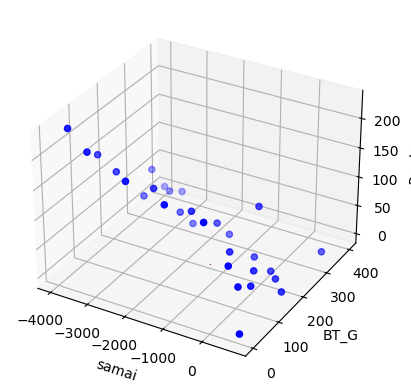

In [37]:
# Define mathematical function for curve fitting 
def func(xy, a, b, c,d, e,f, g): 
    x, y = xy 
    return a + b*x + c*y +  d*y**2 + e*x*y - f**(x/g) 
  
# Perform curve fitting 
popt, pcov = curve_fit(func, (x, y), z) 
  
# Print optimized parameters 
print(popt) 
  
# Create 3D plot of the data points and the fitted curve 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x, y, z, color='blue') 
x_range = np.linspace(0, 1, 50) 
y_range = np.linspace(0, 1, 50) 
X, Y = np.meshgrid(x_range, y_range) 
Z = func((X, Y), *popt) 
ax.plot_surface(X, Y, Z, color='red', alpha=0.5) 
ax.set_xlabel('samai') 
ax.set_ylabel('BT_G') 
ax.set_zlabel('Border') 
plt.show()

In [21]:
tenzen(500,80)

120.45969237316129

[2.38397254e+02 7.79891544e-03 1.00968813e+00 1.32165226e+00]


C:\Users\yohei_hori\AppData\Local\Temp\ipykernel_8236\2712073174.py:3: RuntimeWarning: overflow encountered in power
  return a + b*x - c**(x/d)


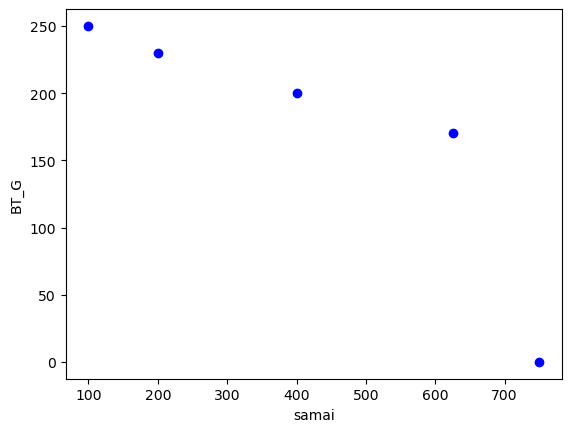

In [26]:
# Define mathematical function for curve fitting 
def func(x, a, b, c, d): 
    return a + b*x - c**(x/d) 
x = np.array([750,625,400,200,100])
y = np.array([0,170,200,230,250])

# Perform curve fitting 
popt, pcov = curve_fit(func, x, y) 
  
# Print optimized parameters 
print(popt) 

# Create 3D plot of the data points and the fitted curve 
fig = plt.figure() 
ax = fig.add_subplot() 
ax.scatter(x, y, color='blue') 
ax.set_xlabel('samai') 
ax.set_ylabel('BT_G') 
plt.show()

In [36]:
print(len(x),len(y),len(z))

30 30 30


In [40]:
import pandas as pd
pd.concat([x,y,z],axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [42]:
samai = -500
btg = 200

180.50933 - 0.059265*samai - 0.267112137*btg - 0.001060607*btg*btg + 0.0002073843*samai*btg/100000 - 1.7326**(samai/84.0124)

114.25694995071669

In [ ]:
sa